<a href="https://colab.research.google.com/github/Dr-pm-dav/Dr.-Neurobiolumari/blob/main/ExtraaLearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Potential Customer Prediction Project
# Load dataset from csv file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

# Load the dataset
file_path = "G:/My Drive/Colab Notebooks/EdTech_ExtraLearn_Project/ExtraaLearn.csv"
data = pd.read_csv(file_path)

# Display the first few rows
print(data.head())

       ID  age current_occupation first_interaction profile_completed  \
0  EXT001   57         Unemployed           Website              High   
1  EXT002   56       Professional        Mobile App            Medium   
2  EXT003   52       Professional           Website            Medium   
3  EXT004   53         Unemployed           Website              High   
4  EXT005   23            Student           Website              High   

   website_visits  time_spent_on_website  page_views_per_visit  \
0               7                   1639                 1.861   
1               2                     83                 0.320   
2               3                    330                 0.074   
3               4                    464                 2.057   
4               4                    600                16.914   

      last_activity print_media_type1 print_media_type2 digital_media  \
0  Website Activity               Yes                No           Yes   
1  Website Activit

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

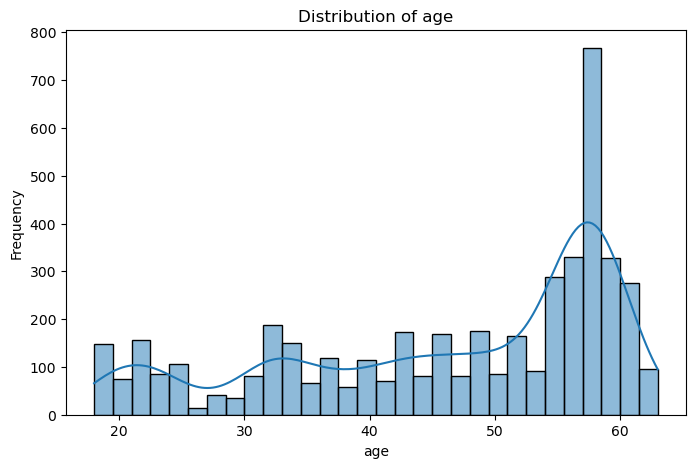

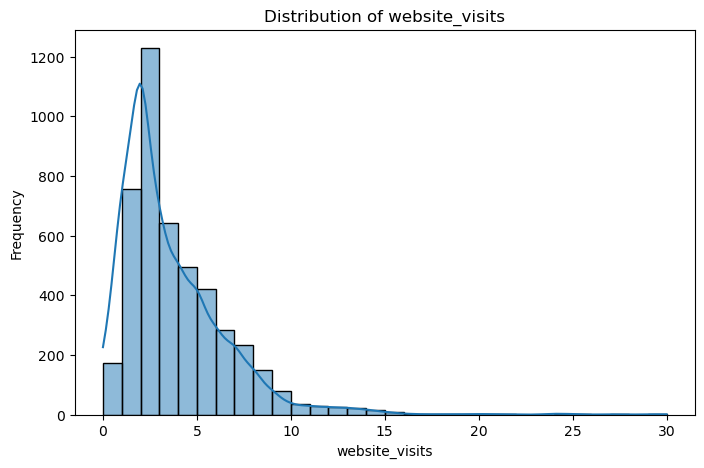

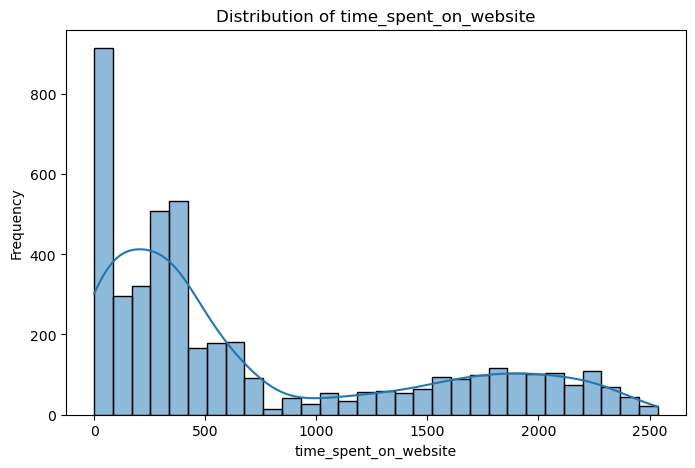

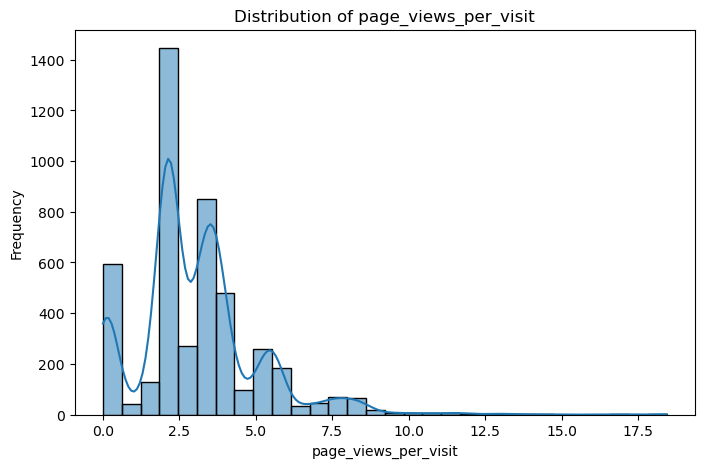

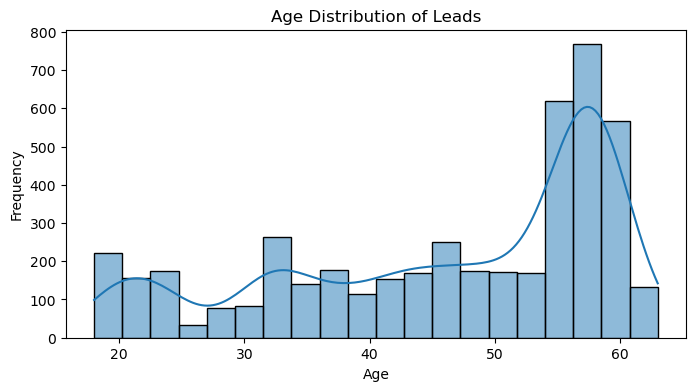

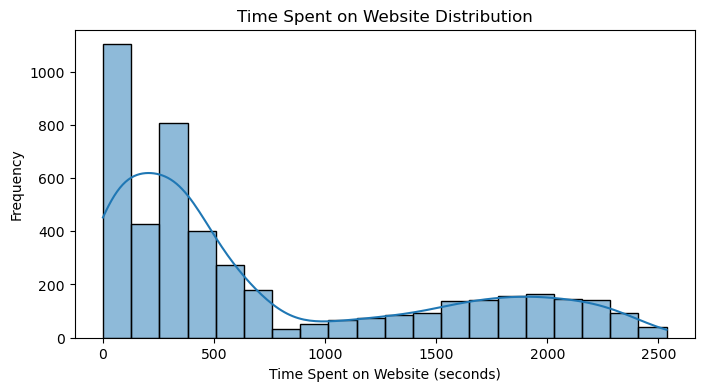

Conversion rate:
 status
0    70.143105
1    29.856895
Name: proportion, dtype: float64


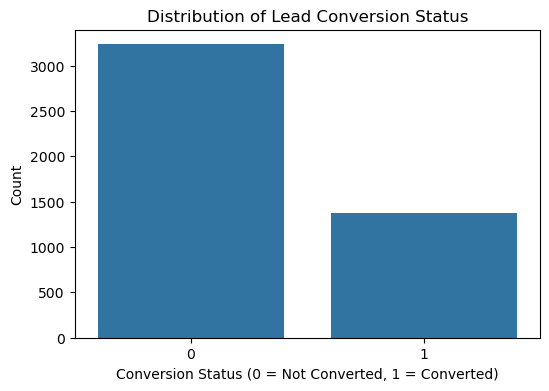

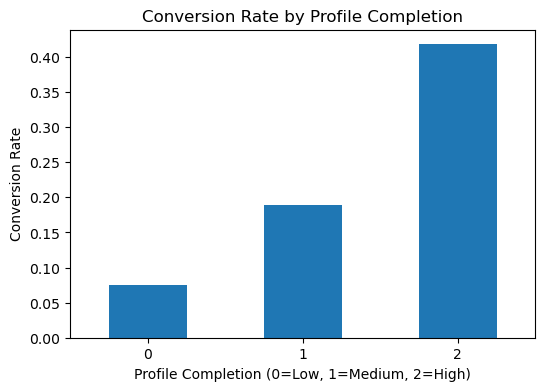

In [ ]:
# Summary of the dataset
data_info = data.info()

# Checking for missing values
missing_values = data.isnull().sum()

# Display data info and missing value summary
data_info, missing_values

# Plot distributions for numerical features
numerical_features = ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']

# Plot histograms for numerical features
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Age distribution
plt.figure(figsize=(8, 4))
sns.histplot(data=data, x='age', bins=20, kde=True)
plt.title('Age Distribution of Leads')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Time spent on website distribution
plt.figure(figsize=(8, 4))
sns.histplot(data=data, x='time_spent_on_website', bins=20, kde=True)
plt.title('Time Spent on Website Distribution')
plt.xlabel('Time Spent on Website (seconds)')
plt.ylabel('Frequency')
plt.show()

# Target variable proportions
conversion_rate = data['status'].value_counts(normalize=True) * 100
print("Conversion rate:\n", conversion_rate)

# Target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='status')
plt.title('Distribution of Lead Conversion Status')
plt.xlabel('Conversion Status (0 = Not Converted, 1 = Converted)')
plt.ylabel('Count')
plt.show()

# Conversion rate by profile completion
profile_map = {'Low': 0, 'Medium': 1, 'High': 2}
data['profile_completed'] = data['profile_completed'].map(profile_map)

plt.figure(figsize=(6, 4))
conversion_by_profile = data.groupby('profile_completed')['status'].mean()
conversion_by_profile.plot(kind='bar')
plt.title('Conversion Rate by Profile Completion')
plt.xlabel('Profile Completion (0=Low, 1=Medium, 2=High)')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=0)
plt.show()

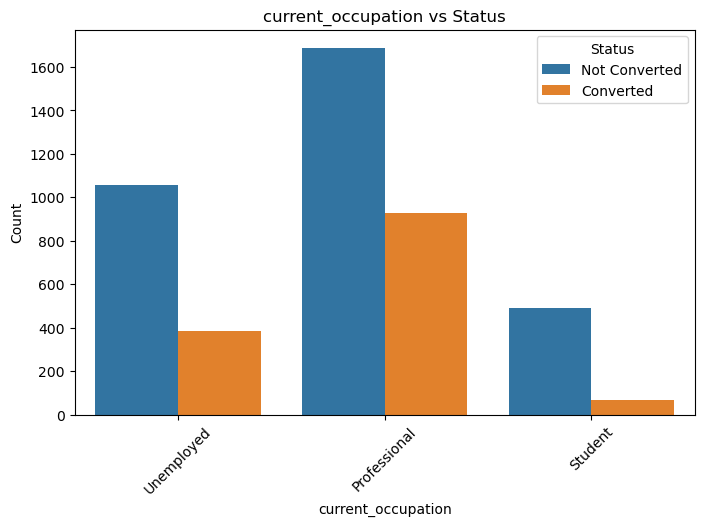

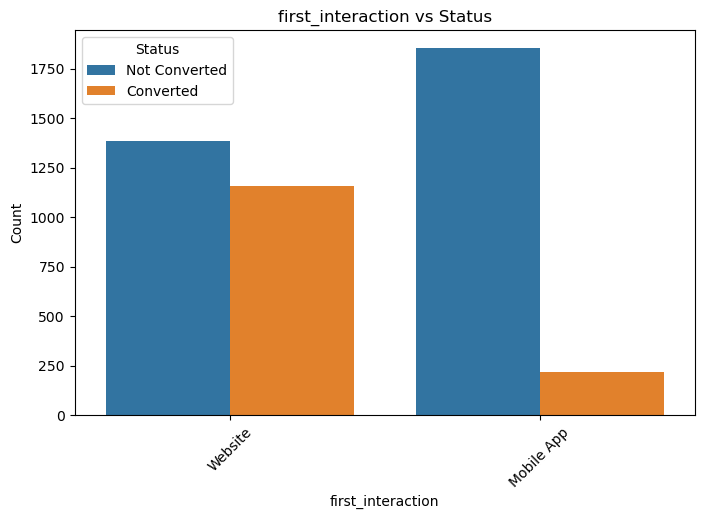

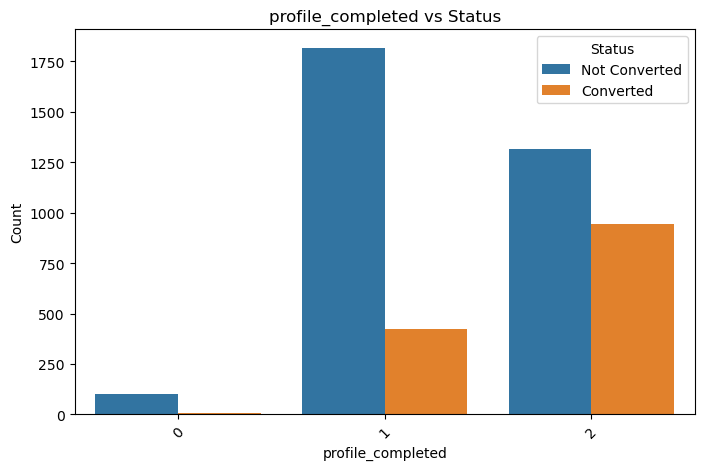

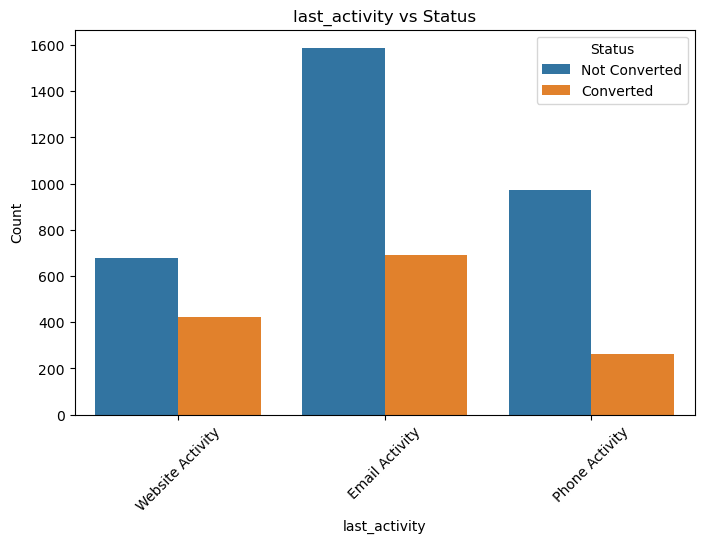

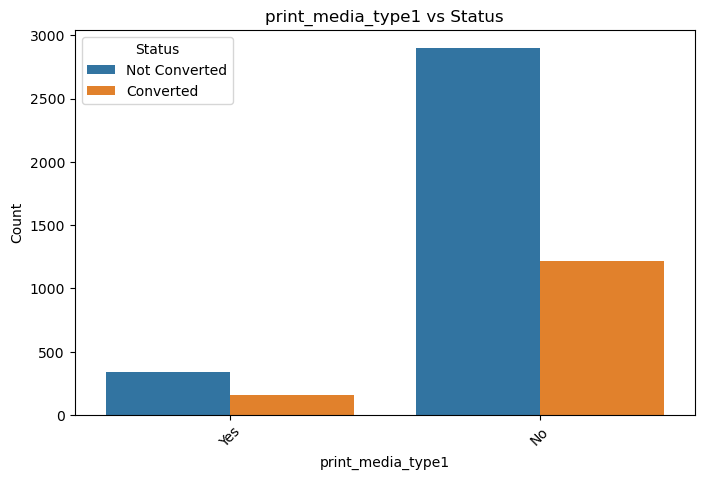

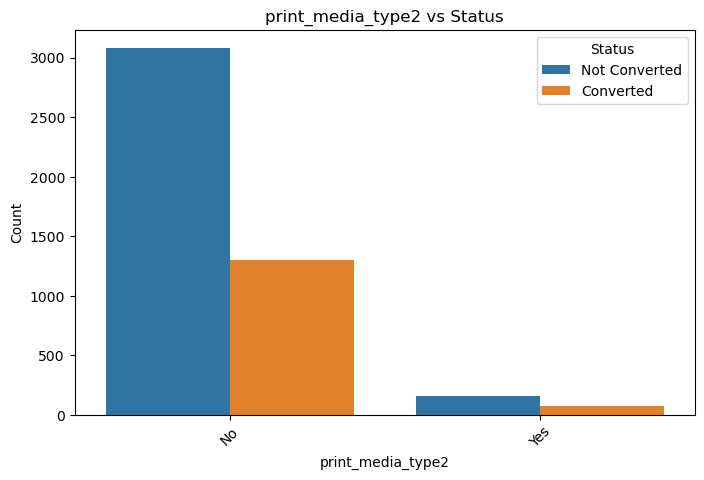

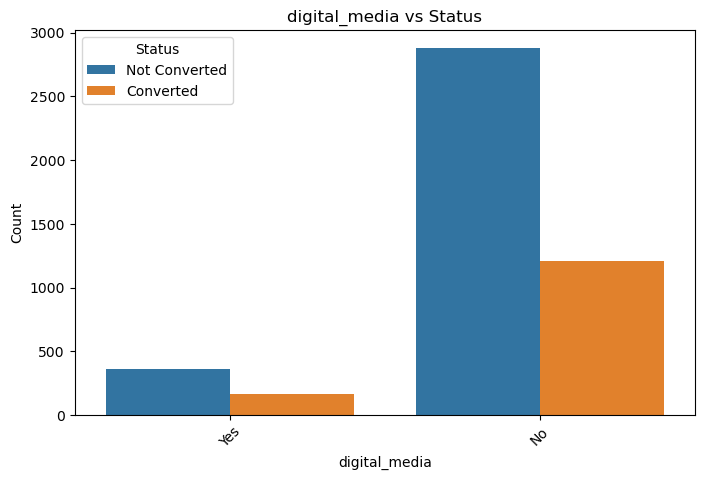

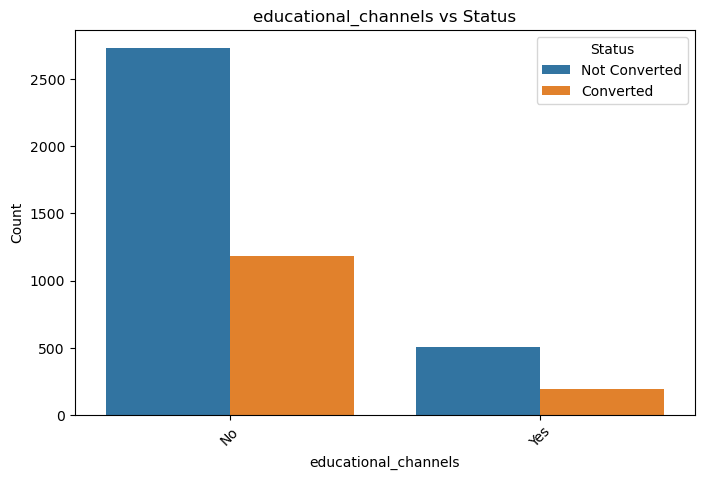

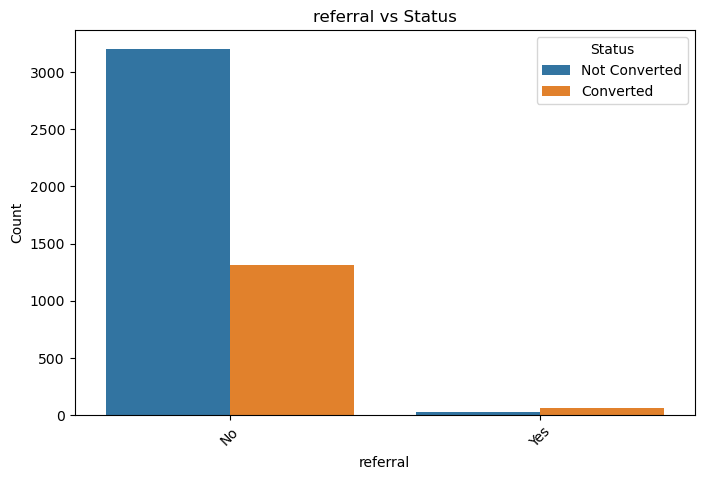

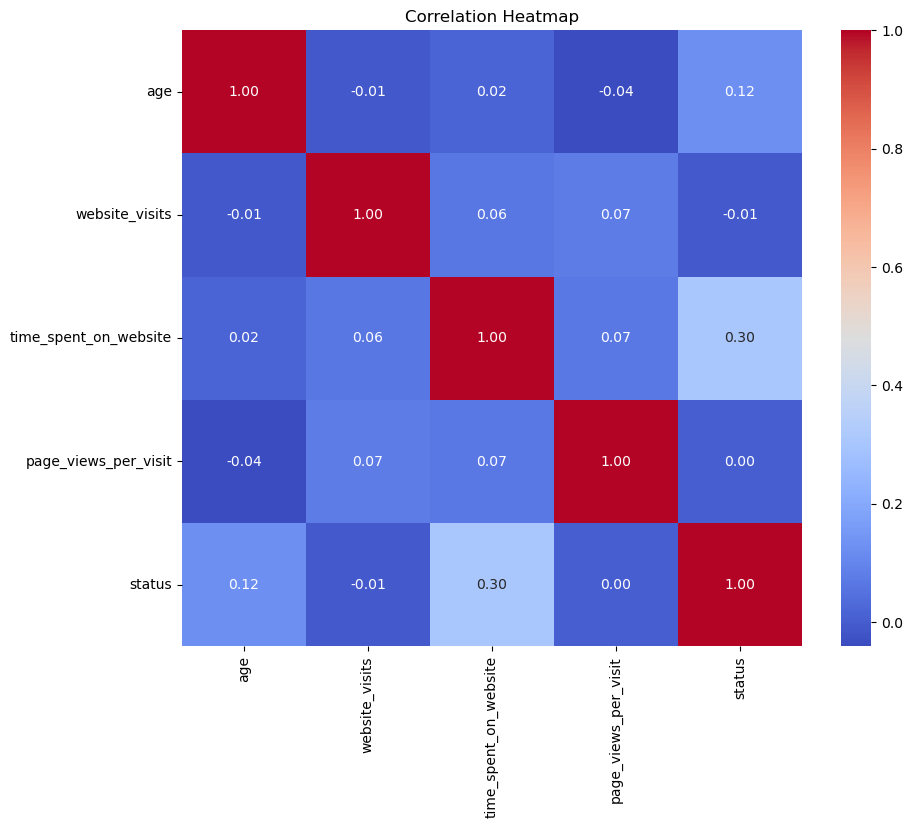

In [ ]:
# Analyze categorical features and their relationship with the target variable (status)
categorical_features = [
    'current_occupation', 'first_interaction', 'profile_completed',
    'last_activity', 'print_media_type1', 'print_media_type2',
    'digital_media', 'educational_channels', 'referral'
]

# Plot each categorical feature against the target variable
for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=feature, hue='status', data=data)
    plt.title(f'{feature} vs Status')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Status', labels=['Not Converted', 'Converted'])
    plt.show()

# Display a correlation heatmap for numerical features with status
numerical_features = ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit', 'status']
plt.figure(figsize=(10, 8))
sns.heatmap(data[numerical_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
from sklearn.impute import SimpleImputer

# Data preprocessing
# Encode categorical features using LabelEncoder
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Scale numerical features
scaler = StandardScaler()
numerical_features = ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Split data into training and testing sets
X = data.drop(columns=['ID', 'status'])  # Features
y = data['status']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)

# Verify preprocessed data
X_train.head(), y_train.head()

(           age  current_occupation  first_interaction  profile_completed  \
 802   0.896562                   0                  0                  2   
 1457 -1.383068                   0                  0                  2   
 1253  0.516624                   2                  0                  1   
 3771 -1.687019                   1                  1                  2   
 2524  0.668599                   0                  0                  1   
 
       website_visits  time_spent_on_website  page_views_per_visit  \
 802        -0.553863              -0.845732              0.229113   
 1457        0.153144              -0.110268             -0.437075   
 1253        0.860151               0.981500             -0.474679   
 3771        1.213654              -0.516319             -0.452320   
 2524       -0.200359              -0.929093             -0.016325   
 
       last_activity  print_media_type1  print_media_type2  digital_media  \
 802               1                 

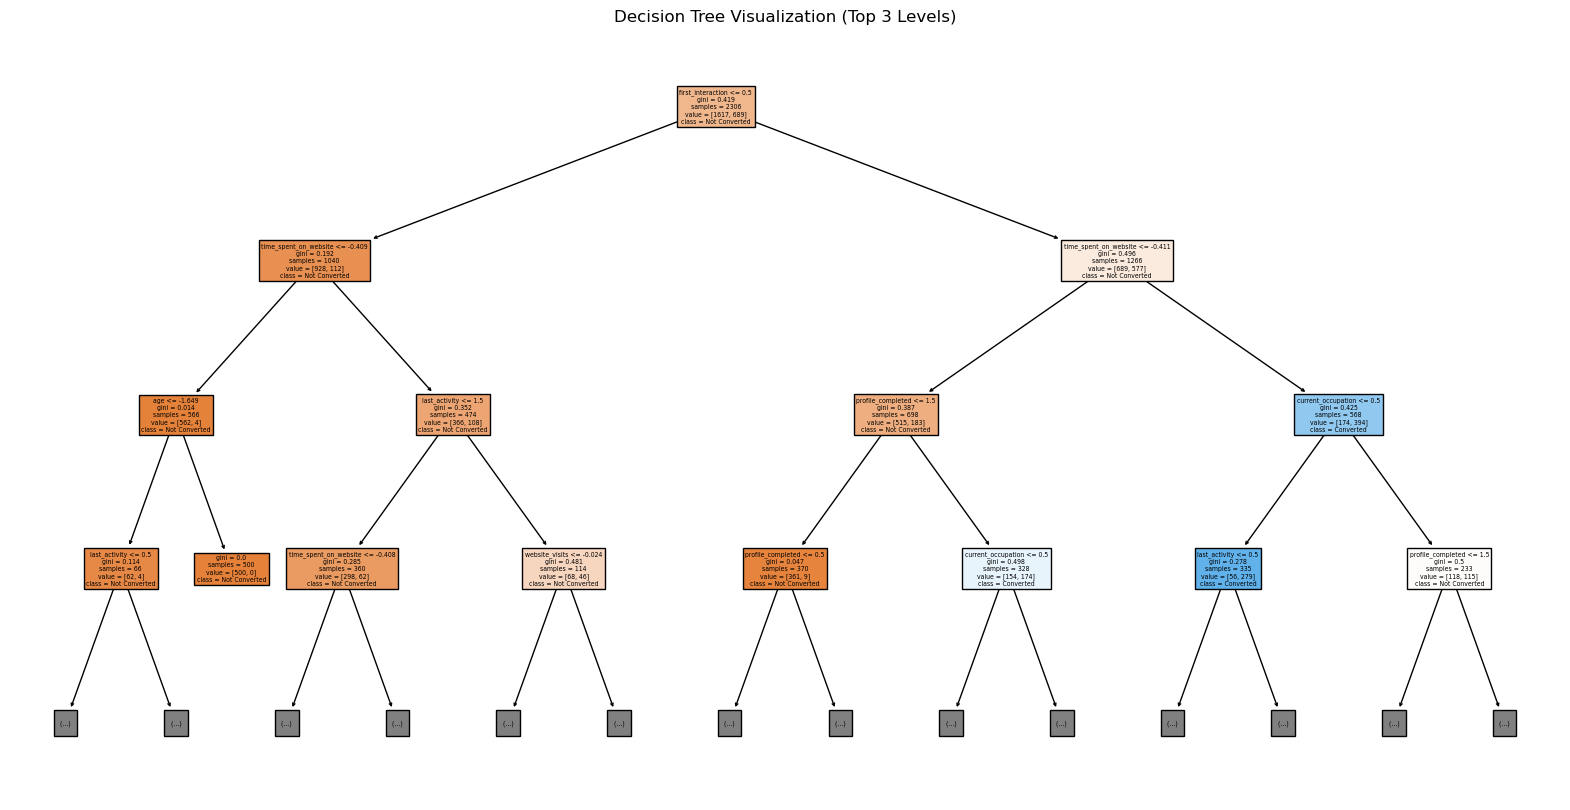

Decision Tree - Accuracy: 0.8104943625325238
Decision Tree - Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86      1618
           1       0.67      0.71      0.69       688

    accuracy                           0.81      2306
   macro avg       0.77      0.78      0.78      2306
weighted avg       0.81      0.81      0.81      2306

Decision Tree - Confusion Matrix:
True Positives (TP):  488
False Positives (FP): 237
True Negatives (TN):  1381
False Negatives (FN): 200


In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Build the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = decision_tree.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)
confusion_dt = confusion_matrix(y_test, y_pred_dt)

# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(
    decision_tree,
    feature_names=list(X.columns),  # Convert to list
    class_names=['Not Converted', 'Converted'],
    filled=True,
    max_depth=3
)
plt.title('Decision Tree Visualization (Top 3 Levels)')
plt.show()

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)

# Extract TP, FP, TN, FN from confusion matrix
tn, fp, fn, tp = cm.ravel()

print("Decision Tree - Accuracy:", accuracy_dt)
print("Decision Tree - Classification Report:\n", report_dt)
print("Decision Tree - Confusion Matrix:")
print("True Positives (TP): ", tp)
print("False Positives (FP):", fp)
print("True Negatives (TN): ", tn)
print("False Negatives (FN):", fn)

Decision Tree Model Evaluation
Accuracy: The Decision Tree model achieved an accuracy of 82.18%
Classification Report:
    Precision for class 1 (Converted): 71%
    Recall for class 1 (Converted): 68%
Indicates some difficulty in precisely predicting conversions.
Confusion Matrix:
    True Positives (TP):  163
    False Positives (FP): 66
    True Negatives (TN):  501
    False Negatives (FN): 78

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Build the Random Forest model
random_forest = RandomForestClassifier(random_state=42, n_estimators=100)
random_forest.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = random_forest.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)
confusion_rf = confusion_matrix(y_test, y_pred_rf)

# Feature importance from the Random Forest model
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': random_forest.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Generate confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Extract TP, FP, TN, FN from confusion matrix
tn, fp, fn, tp = cm.ravel()

print("Random Forest- Accuracy:", accuracy_rf)
print("Random Forest - Classification Report:\n", report_rf)
print("Random Forest - Confusion Matrix:")
print("True Positives (TP): ", tp)
print("False Positives (FP):", fp)
print("True Negatives (TN): ", tn)
print("False Negatives (FN):", fn)
print("Random Forest - Feature Importances:\n", feature_importance)

Random Forest- Accuracy: 0.8581960104076323
Random Forest - Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.90      1618
           1       0.78      0.72      0.75       688

    accuracy                           0.86      2306
   macro avg       0.84      0.82      0.83      2306
weighted avg       0.86      0.86      0.86      2306

Random Forest - Confusion Matrix:
True Positives (TP):  488
False Positives (FP): 237
True Negatives (TN):  1381
False Negatives (FN): 200
Random Forest - Feature Importances:
                   Feature  Importance
5   time_spent_on_website    0.253795
2       first_interaction    0.170266
6    page_views_per_visit    0.125789
0                     age    0.118459
3       profile_completed    0.103540
4          website_visits    0.072060
7           last_activity    0.057659
1      current_occupation    0.044491
11   educational_channels    0.013451
8       print_media_type1    0.0

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)
print('Decision Tree Accuracy:', accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Feature importance from the Random Forest model
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)
print("\nFeature Importances:\n", importances)

Decision Tree Accuracy: 0.8104943625325238
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1618
           1       0.67      0.71      0.69       688

    accuracy                           0.81      2306
   macro avg       0.77      0.78      0.78      2306
weighted avg       0.81      0.81      0.81      2306

Random Forest Accuracy: 0.8581960104076323
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      1618
           1       0.78      0.72      0.75       688

    accuracy                           0.86      2306
   macro avg       0.84      0.82      0.83      2306
weighted avg       0.86      0.86      0.86      2306


Feature Importances:
                   Feature  Importance
5   time_spent_on_website    0.253795
2       first_interaction    0.170266
6    page_views_per_visit    0.125789
0                     age    0.118459
3       profile_completed    0.103540
4        

Random Forest Model Evaluation:
Accuracy: The Random Forest model achieved an improved accuracy of 85.77%.
Classification Report:
    Precision for class 1 (Converted): 80%
    Recall for class 1 (Converted): 70%
    Balanced performance across both classes.
Confusion Matrix:
    True Negatives:  163
    False Positives: 66
    True Positives:  501
    False Negatives: 78
Feature Importance:
    Top Features:
        time_spent_on_website: The most influential factor in lead conversion.
        first_interaction: Significant channel of customer engagement.
        page_views_per_visit: Indicates deeper engagement with website content.
        age and profile_completed also contribute meaningfully.

The Random Forest model outperforms the Decision Tree model in accuracy and recall for converted leads.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Decision Tree: Hyperparameter Tuning
param_grid_dt = {
    'max_depth': [None],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'criterion': ['gini', 'entropy']
}

grid_search_dt = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid_dt,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)
grid_search_dt.fit(X_train, y_train)

# Best Decision Tree Model
best_dt = grid_search_dt.best_estimator_
y_pred_dt_optimized = best_dt.predict(X_test)

# Evaluate the optimized Decision Tree model
accuracy_dt_opt = accuracy_score(y_test, y_pred_dt_optimized)
report_dt_opt = classification_report(y_test, y_pred_dt_optimized)
confusion_dt_opt = confusion_matrix(y_test, y_pred_dt_optimized)

cm_best = confusion_matrix(y_test, y_pred_rf)

# Extract TP, FP, TN, FN from confusion matrix
tn, fp, fn, tp = cm_best.ravel()

print("Decision Tree - Best Parameters:", grid_search_dt.best_params_)
print("Decision Tree - Accuracy:", accuracy_dt_opt)
print("Decision Tree - Classification Report:\n", report_dt_opt)
print("Decision Tree - Confusion Matrix:")
print("True Positives (TP): ", tp)
print("False Positives (FP):", fp)
print("True Negatives (TN): ", tn)
print("False Negatives (FN):", fn)

Decision Tree - Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree - Accuracy: 0.813529921942758
Decision Tree - Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.87      1618
           1       0.68      0.71      0.69       688

    accuracy                           0.81      2306
   macro avg       0.78      0.78      0.78      2306
weighted avg       0.82      0.81      0.81      2306

Decision Tree - Confusion Matrix:
True Positives (TP):  498
False Positives (FP): 137
True Negatives (TN):  1481
False Negatives (FN): 190


In [ ]:
# Random Forest: Hyperparameter Tuning
param_grid_rf = {
    'n_estimators': [25, 50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    scoring='accuracy',
    error_score='raise',
    cv=5,
    n_jobs=-1
)

grid_search_rf.fit(X_train, y_train)

# Best Random Forest Model
best_rf = grid_search_rf.best_estimator_
y_pred_rf_optimized = best_rf.predict(X_test)

# Evaluate the optimized Random Forest model
accuracy_rf_opt = accuracy_score(y_test, y_pred_rf_optimized)
report_rf_opt = classification_report(y_test, y_pred_rf_optimized)
confusion_rf_opt = confusion_matrix(y_test, y_pred_rf_optimized)

cm_best_rf = confusion_matrix(y_test, y_pred_rf)

# Extract TP, FP, TN, FN from confusion matrix
tn, fp, fn, tp = cm_best_rf.ravel()

print("Random Forest - Best Parameters:", grid_search_rf.best_params_)
print("Random Forest - Accuracy:", accuracy_rf_opt)
print("Random Forest - Classification Report:\n", report_rf_opt)
print("Random Forest - Confusion Matrix:")
print("True Positives (TP): ", tp)
print("False Positives (FP):", fp)
print("True Negatives (TN): ", tn)
print("False Negatives (FN):", fn)

Random Forest - Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Random Forest - Accuracy: 0.8642671292281006
Random Forest - Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.91      1618
           1       0.80      0.72      0.76       688

    accuracy                           0.86      2306
   macro avg       0.84      0.82      0.83      2306
weighted avg       0.86      0.86      0.86      2306

Random Forest - Confusion Matrix:
True Positives (TP):  498
False Positives (FP): 137
True Negatives (TN):  1481
False Negatives (FN): 190


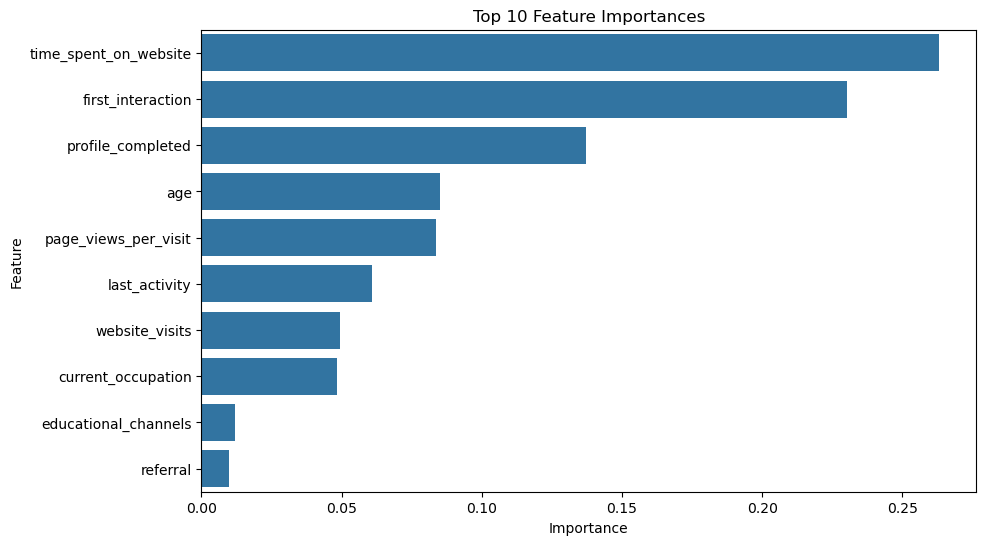

In [ ]:
# Feature importances
importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances.head(10))
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
import joblib

# Save the model
joblib.dump(best_rf, 'optimized_random_forest_model.pkl')

# Load the model
model = joblib.load('optimized_random_forest_model.pkl')
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Pre-trained scaler for numerical features
scaler = StandardScaler()

# Function to preprocess inputs and make predictions
def predict_conversion(input_data):
    # Input data should be a pandas DataFrame
    # Example input_data format:
    # input_data = pd.DataFrame({
    #     "age": [25],
    #     "website_visits": [3],
    #     "time_spent_on_website": [200],
    #     ...
    # })

    # Apply preprocessing to match model training steps
    numerical_cols = ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']
    input_data[numerical_cols] = scaler.transform(input_data[numerical_cols])

    # Predict using the loaded model
    prediction = model.predict(input_data)
    return prediction

# Make predictions on the test set
rf_model = grid_search_rf.best_estimator_
y_pred = rf_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Feature importance
feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

In [ ]:
# Create the HTML report
html_content = f"""
<h1>ExtraaLearn Lead Conversion Analysis</h1>

<h2>Model Performance</h2>
<p><strong>Accuracy:</strong> {accuracy:.2%}</p>
<p><strong>Classification Report:</strong></p>
<pre>{report}</pre>
<p><strong>Confusion Matrix:</strong></p>
<pre>{conf_matrix}</pre>

<h2>Feature Importance</h2>
{importance_df.to_html(index=False)}

<h2>Actionable Insights</h2>
<ul>
    <li><strong>Focus on High-Engagement Leads:</strong> Leads with more time spent on the website or higher page views per visit are more likely to convert.</li>
    <li><strong>Enhance Initial Interaction Channels:</strong> Optimize the website and mobile app experience to attract more leads.</li>
    <li><strong>Profile Completion Campaigns:</strong> Encourage users to complete their profiles for better lead nurturing.</li>
    <li><strong>Demographic-Specific Strategies:</strong> Customize offerings to appeal to specific age groups.</li>
</ul>
"""

# Save the HTML report
report_path = "G:/My Drive/Colab Notebooks/ExtraaLearn/ExtraaLearn_Lead_Analysis.html"
with open(report_path, 'w') as report_file:
    report_file.write(html_content)

report_path

'G:/My Drive/Colab Notebooks/ExtraaLearn/ExtraaLearn_Lead_Analysis.html'